#### **Dataset Description**  
The **State Transaction Dataset** provides insights into financial transactions occurring across different states in India. It contains detailed records of transactions, including the originating state (homestatename), destination state (salestatename), transaction count (txn_count), and other relevant attributes. The dataset helps in analyzing transaction patterns, economic activities, and financial interactions between states.


#### **Dataset Overview**  
- Total Records: 351 (from index 0 to 350)  
- Total Columns: 7  

#### **Key Attributes and Their Descriptions:**  
1. homestatecode – Encoded numerical representation of the originating state.  
2. salestatecode – Encoded numerical representation of the destination state.  
3. homestatename – Name of the state where the transaction originates.  
4. salestatename – Name of the state where the transaction is received.  
5. month – Represents the month of the transaction (December 2024 in this dataset).  
6. year – Represents the year of the transaction (2024).  
7. txn_count – The total number of financial transactions between the two states.  

#### **Key Insights:**  
- The dataset is clean and complete, with no missing values.  
- It covers both small-scale and high-volume transactions, providing a broad view of financial interactions at the state level.  
- It can be used for trend analysis, policy evaluation, and economic studies to understand transaction behaviors across different states.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [147]:
df = pd.read_csv('impds_dec_2024.csv')
df

,homestatecode,salestatecode,month,year,txn_count,salestatename,homestatename
0,5,1,12,2024,13,JAMMU AND KASHMIR,UTTARAKHAND
1,6,1,12,2024,28,JAMMU AND KASHMIR,HARYANA
2,7,1,12,2024,7,JAMMU AND KASHMIR,DELHI
3,8,1,12,2024,8,JAMMU AND KASHMIR,RAJASTHAN
4,9,1,12,2024,2196,JAMMU AND KASHMIR,UTTAR PRADESH
...,...,...,...,...,...,...,...
346,23,38,12,2024,888,Dadar & Nagar Haveli & Daman & Diu,MADHYA PRADESH
347,24,38,12,2024,1033,Dadar & Nagar Haveli & Daman & Diu,GUJARAT
348,29,38,12,2024,2,Dadar & Nagar Haveli & Daman & Diu,KARNATAKA
349,32,38,12,2024,2,Dadar & Nagar Haveli & Daman & Diu,KERALA


In [149]:
df.describe()

,homestatecode,salestatecode,month,year,txn_count
count,351.000000,351.000000,351.0,351.0,351.000000
mean,17.000000,18.581197,12.0,2024.0,2314.772080
std,10.201961,11.854768,0.0,0.0,16910.829673
min,1.000000,1.000000,12.0,2024.0,1.000000
25%,8.000000,7.000000,12.0,2024.0,4.000000
50%,18.000000,19.000000,12.0,2024.0,20.000000
75%,24.000000,29.000000,12.0,2024.0,254.000000
max,38.000000,38.000000,12.0,2024.0,224671.000000


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   homestatecode  351 non-null    int64 
 1   salestatecode  351 non-null    int64 
 2   month          351 non-null    int64 
 3   year           351 non-null    int64 
 4   txn_count      351 non-null    int64 
 5   salestatename  351 non-null    object
 6   homestatename  351 non-null    object
dtypes: int64(5), object(2)
memory usage: 19.3+ KB


In [153]:
print(df.isnull().sum()) 


homestatecode    0
salestatecode    0
month            0
year             0
txn_count        0
salestatename    0
homestatename    0
dtype: int64


### Counting Unique States

In [14]:
print("\nUnique Home States:", df['homestatename'].nunique())


Unique Home States: 21


In [16]:
print("Unique Sale States:", df['salestatename'].nunique())

Unique Sale States: 28


### Top 5 States by Transaction Count

In [22]:
top_states = df.groupby('homestatename')['txn_count'].sum().nlargest(5)

In [24]:
print("\nTop 5 States by Transaction Count:\n", top_states)


Top 5 States by Transaction Count:
 homestatename
UTTAR PRADESH     362154
BIHAR             340123
MADHYA PRADESH     41544
HARYANA            18511
JHARKHAND           9958
Name: txn_count, dtype: int64


### Filter transactions where home state is 'DELHI'



In [27]:
delhi_transactions = df[df['homestatename'] == 'DELHI']
print(delhi_transactions)

     homestatecode  salestatecode  month  year  txn_count  \
2                7              1     12  2024          7   
15               7              2     12  2024         33   
28               7              3     12  2024         39   
46               7              5     12  2024        195   
58               7              6     12  2024        864   
95               7              8     12  2024        195   
111              7              9     12  2024       1738   
129              7             10     12  2024       2926   
158              7             18     12  2024          1   
165              7             19     12  2024         67   
177              7             20     12  2024         47   
189              7             22     12  2024          7   
202              7             23     12  2024        170   
215              7             24     12  2024         65   
234              7             27     12  2024         83   
251              7      

### Filter transactions where home state is 'DELHI' and sale state is 'BIHAR'



In [17]:
delhi_to_bihar = df[(df['homestatename'] == 'DELHI') & (df['salestatename'] == 'BIHAR')]
print(delhi_to_bihar)

     homestatecode  salestatecode  month  year  txn_count salestatename  \
129              7             10     12  2024       2926         BIHAR   

    homestatename  
129         DELHI  


### Get transactions with more than 10,000 counts

In [31]:
high_transactions = df[df['txn_count'] > 10000]
print(high_transactions)


     homestatecode  salestatecode  month  year  txn_count     salestatename  \
17               9              2     12  2024      13727  HIMACHAL PRADESH   
48               9              5     12  2024      14650       UTTARAKHAND   
60               9              6     12  2024      42000           HARYANA   
61              10              6     12  2024      38126           HARYANA   
76               6              7     12  2024      12855             DELHI   
78               9              7     12  2024     210187             DELHI   
79              10              7     12  2024     224671             DELHI   
84              23              7     12  2024      21203             DELHI   
96               9              8     12  2024      12395         RAJASTHAN   
217              9             24     12  2024      10680           GUJARAT   
236              9             27     12  2024      41235       MAHARASHTRA   
237             10             27     12  2024      


### Total transactions per home state

In [34]:

statewise_transactions = df.groupby('homestatename')['txn_count'].sum()
print(statewise_transactions)


homestatename
ANDAMAN AND NICOBAR ISLANDS                2
ANDHRA PRADESH                          3895
ASSAM                                   1347
BIHAR                                 340123
CHHATTISGARH                            2740
DELHI                                   6480
Dadar & Nagar Haveli & Daman & Diu        18
GUJARAT                                 2025
HARYANA                                18511
HIMACHAL PRADESH                         170
JAMMU AND KASHMIR                        250
JHARKHAND                               9958
KARNATAKA                               2148
KERALA                                   158
MADHYA PRADESH                         41544
RAJASTHAN                               9199
TAMIL NADU                              1132
TELANGANA                                 93
UTTAR PRADESH                         362154
UTTARAKHAND                             7066
WEST BENGAL                             3472
Name: txn_count, dtype: int64


###  top 5 states with the highest transactions

In [37]:
top_states = statewise_transactions.sort_values(ascending=False).head(5)
print(top_states)


homestatename
UTTAR PRADESH     362154
BIHAR             340123
MADHYA PRADESH     41544
HARYANA            18511
JHARKHAND           9958
Name: txn_count, dtype: int64


### Total transactions per home and sale state

In [164]:
state_pair_transactions = df.groupby(['homestatename', 'salestatename'])['txn_count'].sum().reset_index()
print(state_pair_transactions)


                   homestatename                salestatename  txn_count
0    ANDAMAN AND NICOBAR ISLANDS                      HARYANA          1
1    ANDAMAN AND NICOBAR ISLANDS                  WEST BENGAL          1
2                 ANDHRA PRADESH  ANDAMAN AND NICOBAR ISLANDS          2
3                 ANDHRA PRADESH                        BIHAR         12
4                 ANDHRA PRADESH                 CHHATTISGARH          2
..                           ...                          ...        ...
346                  WEST BENGAL                       SIKKIM          1
347                  WEST BENGAL                    TELANGANA         14
348                  WEST BENGAL                      TRIPURA          1
349                  WEST BENGAL                UTTAR PRADESH         20
350                  WEST BENGAL                  UTTARAKHAND          6

[351 rows x 3 columns]


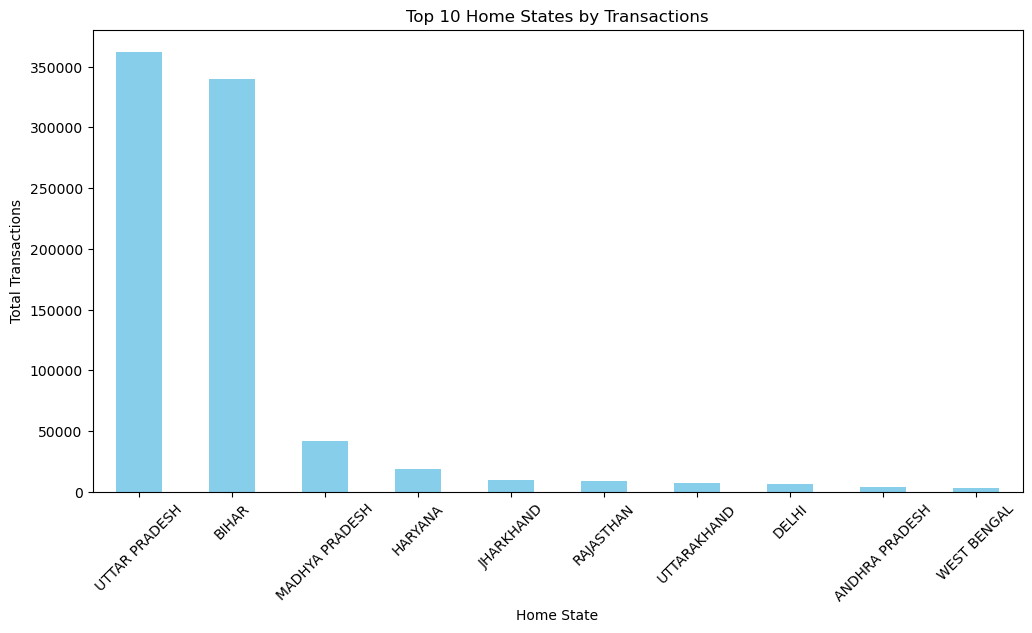

In [166]:
# Grouping by 'homestatename' and summing transaction counts
top_home_states = df.groupby('homestatename')['txn_count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_home_states.plot(kind='bar', color='skyblue')
plt.xlabel("Home State")
plt.ylabel("Total Transactions")
plt.title("Top 10 Home States by Transactions")
plt.xticks(rotation=45)
plt.show()

### A bar chart visualizing the top 10 home states by total transactions, with Uttar Pradesh and Bihar having the highest transaction counts.

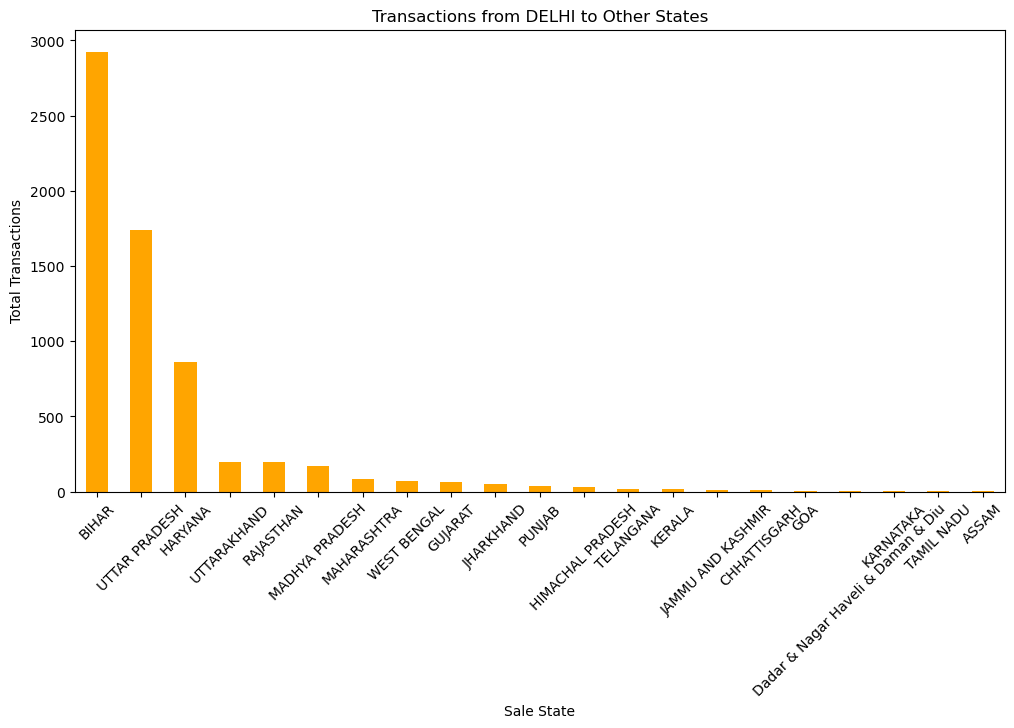

In [169]:
state_name = "DELHI"  
state_data = df[df["homestatename"] == state_name].groupby("salestatename")["txn_count"].sum()

plt.figure(figsize=(12, 6))
state_data.sort_values(ascending=False).plot(kind="bar", color="orange")
plt.xlabel("Sale State")
plt.ylabel("Total Transactions")
plt.title(f"Transactions from {state_name} to Other States")
plt.xticks(rotation=45)
plt.show()

### It showing the distribution of transactions from Delhi to various other states, with Bihar having the highest transaction count.

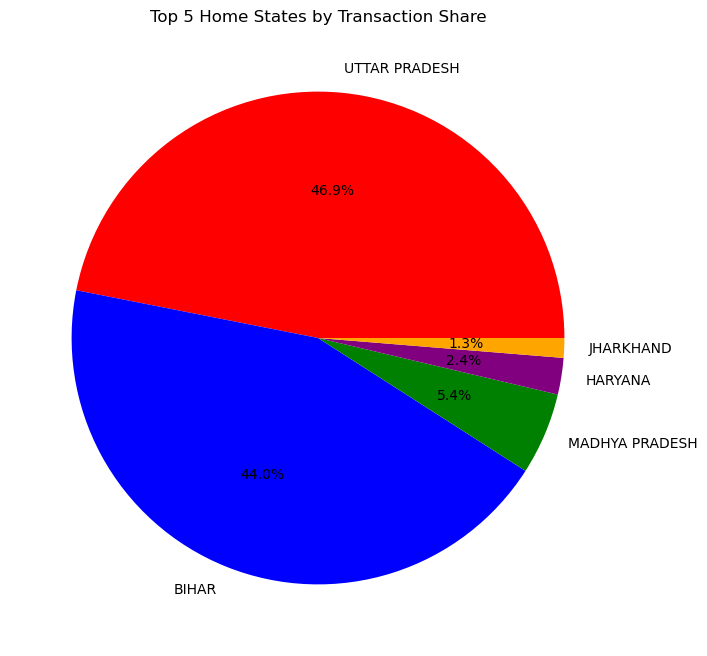

In [50]:
home_state_distribution = df.groupby("homestatename")["txn_count"].sum().nlargest(5)  # Top 5 states

plt.figure(figsize=(8, 8))
plt.pie(home_state_distribution, labels=home_state_distribution.index, autopct="%1.1f%%", colors=["red", "blue", "green", "purple", "orange"])
plt.title("Top 5 Home States by Transaction Share")
plt.show()


### A pie chart representing the top 5 home states by transaction share, with Uttar Pradesh and Bihar having the highest proportions.









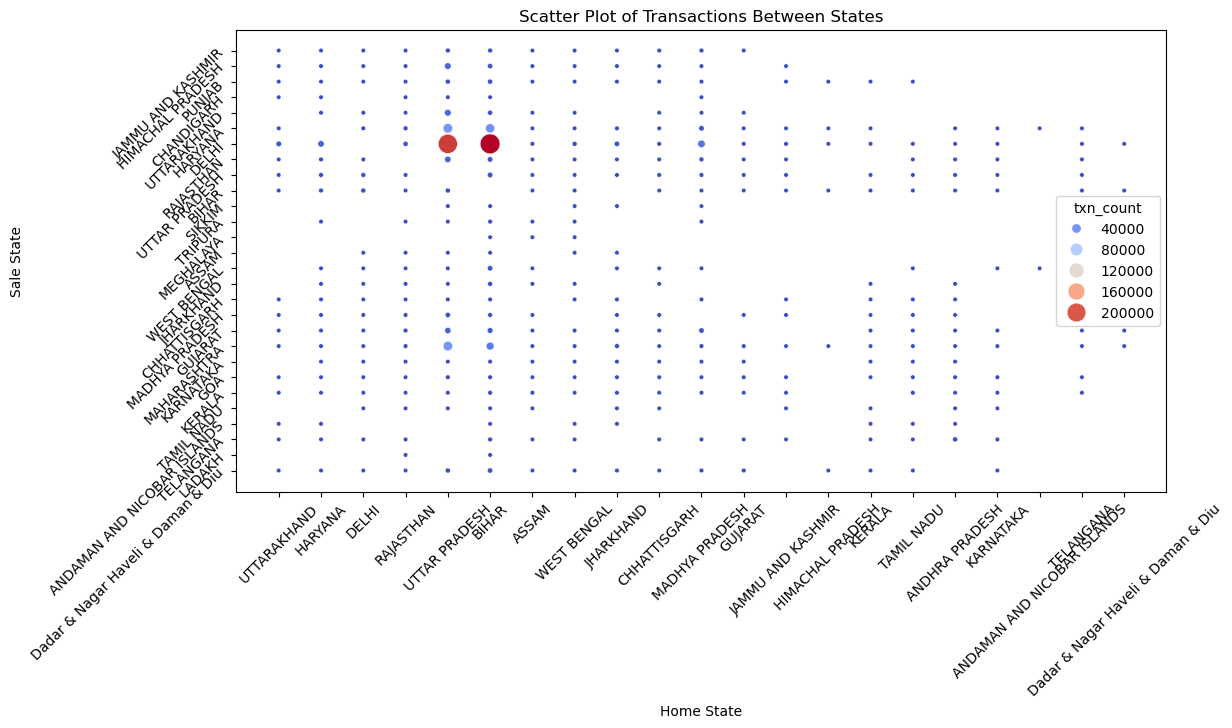

In [53]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="homestatename", y="salestatename", size="txn_count", hue="txn_count", palette="coolwarm", sizes=(10, 200))
plt.xlabel("Home State")
plt.ylabel("Sale State")
plt.title("Scatter Plot of Transactions Between States")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


### transactions between home states and sale states, where the size and color of the points represent the transaction count, highlighting high-transaction pairs.

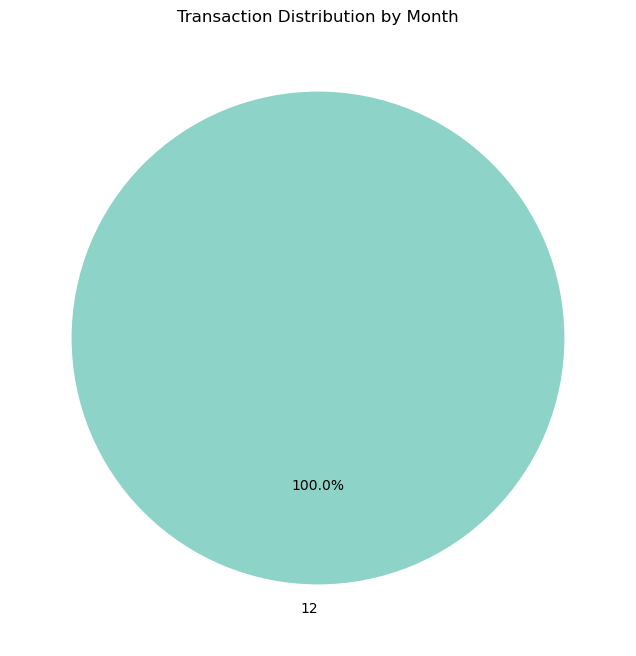

In [59]:
# Group transactions by month
monthly_transactions = df.groupby('month')['txn_count'].sum()
plt.figure(figsize=(8, 8))
plt.pie(monthly_transactions, labels=monthly_transactions.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title("Transaction Distribution by Month")
plt.show()

### pie chart of transaction distribution by month, but it appears incorrect since one month (12) holds 100% of transactions, suggesting a data issue or missing values for other months.









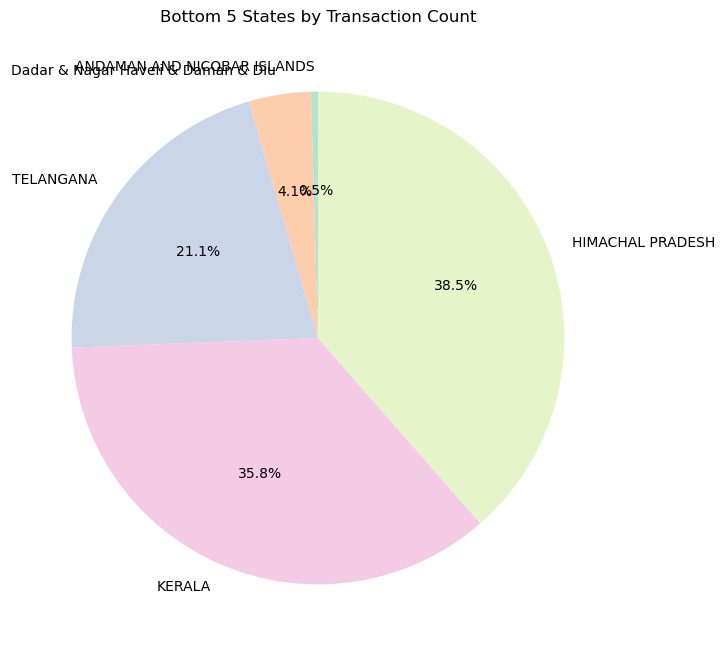

In [62]:
bottom_states = df.groupby('homestatename')['txn_count'].sum().nsmallest(5)
plt.figure(figsize=(8, 8))
plt.pie(bottom_states, labels=bottom_states.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
plt.title("Bottom 5 States by Transaction Count")
plt.show()

### It depicting the bottom 5 states with the lowest transaction counts, highlighting their relative share of total transactions.

In [66]:
print(df.columns)


Index(['homestatecode', 'salestatecode', 'month', 'year', 'txn_count',
       'salestatename', 'homestatename'],
      dtype='object')


In [68]:
df.columns = df.columns.str.lower()  


In [70]:
df

,homestatecode,salestatecode,month,year,txn_count,salestatename,homestatename
0,5,1,12,2024,13,JAMMU AND KASHMIR,UTTARAKHAND
1,6,1,12,2024,28,JAMMU AND KASHMIR,HARYANA
2,7,1,12,2024,7,JAMMU AND KASHMIR,DELHI
3,8,1,12,2024,8,JAMMU AND KASHMIR,RAJASTHAN
4,9,1,12,2024,2196,JAMMU AND KASHMIR,UTTAR PRADESH
...,...,...,...,...,...,...,...
346,23,38,12,2024,888,Dadar & Nagar Haveli & Daman & Diu,MADHYA PRADESH
347,24,38,12,2024,1033,Dadar & Nagar Haveli & Daman & Diu,GUJARAT
348,29,38,12,2024,2,Dadar & Nagar Haveli & Daman & Diu,KARNATAKA
349,32,38,12,2024,2,Dadar & Nagar Haveli & Daman & Diu,KERALA


##  The  dataframe containing transaction details between different states, including columns for home state, sale state, month, year, and transaction count.

C:\Users\VINITHA\AppData\Local\Temp\ipykernel_7460\1714798968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="homestatename", y="txn_count", palette="coolwarm")


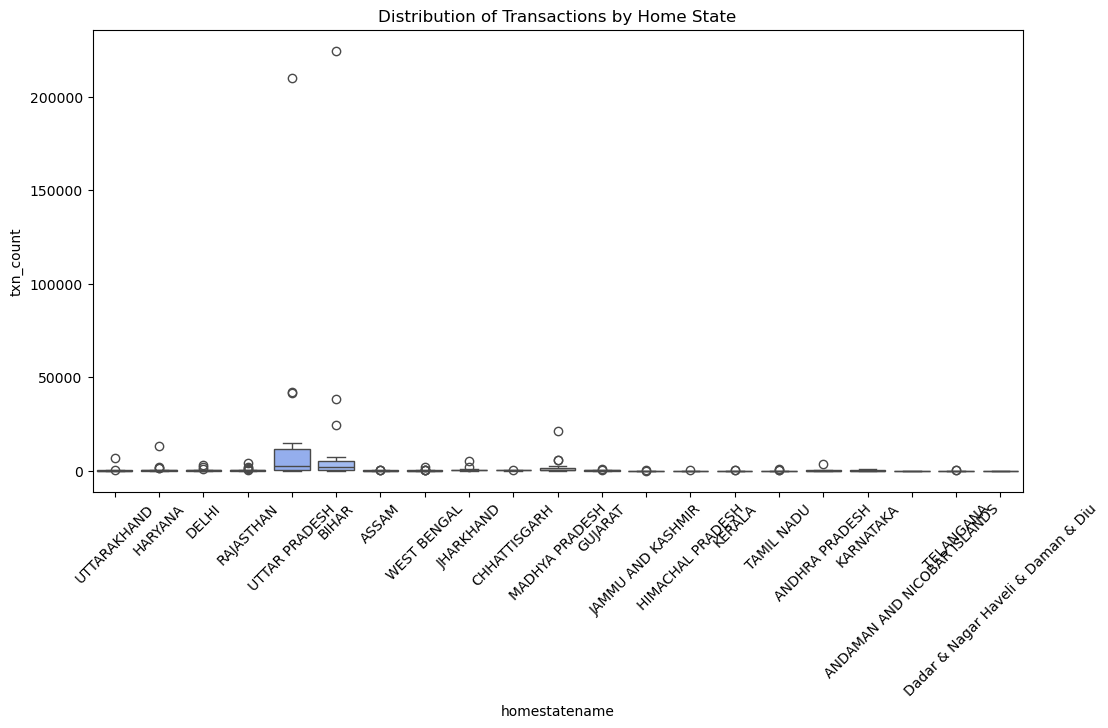

In [73]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="homestatename", y="txn_count", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribution of Transactions by Home State")
plt.show()


## The boxplot visualizing the distribution of transaction counts across different home states, highlighting outliers and variations in transaction volumes.

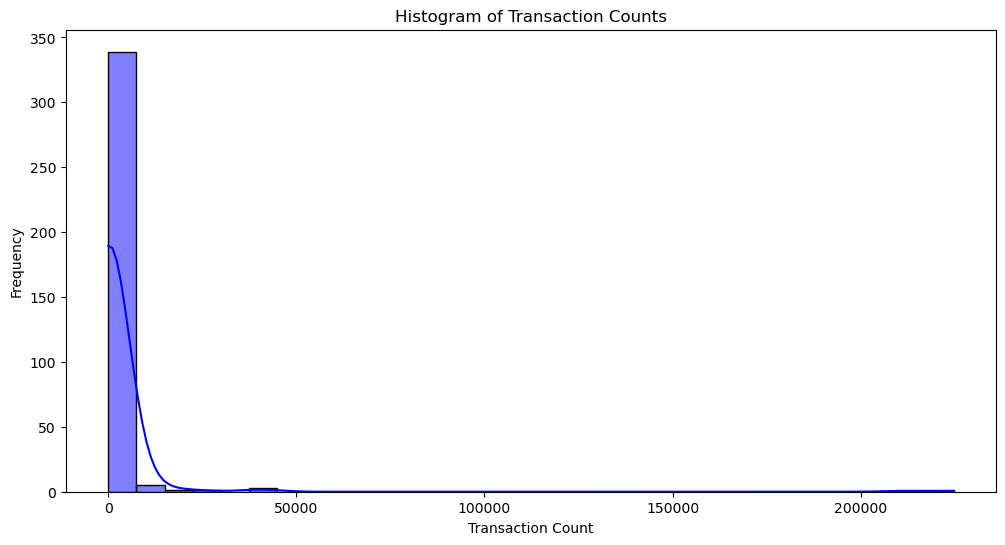

In [76]:
plt.figure(figsize=(12, 6))
sns.histplot(df["txn_count"], bins=30, kde=True, color="blue")
plt.xlabel("Transaction Count")
plt.ylabel("Frequency")
plt.title("Histogram of Transaction Counts")
plt.show()


## histogram of transaction counts, indicating a highly skewed distribution where most transactions are of lower values, with a few extreme outliers having very high counts.









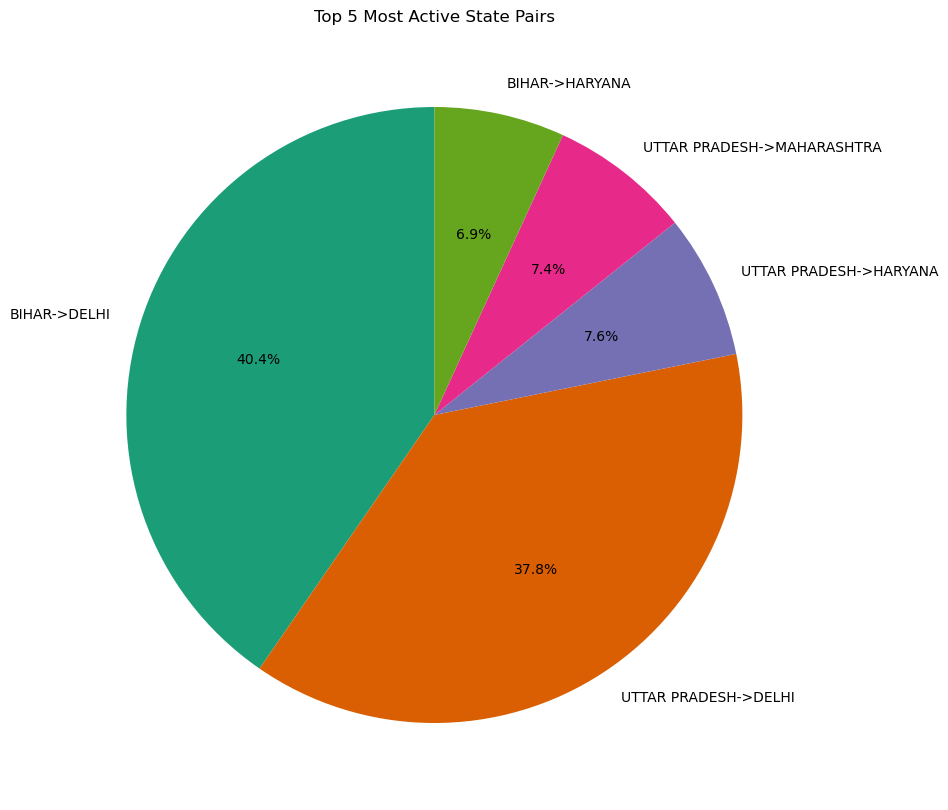

In [80]:
top_state_pairs = df.groupby(['homestatename', 'salestatename'])['txn_count'].sum().nlargest(5)
plt.figure(figsize=(10, 10))
plt.pie(top_state_pairs, labels=[f"{h}->{s}" for h, s in top_state_pairs.index], autopct='%1.1f%%', startangle=90, colors=plt.cm.Dark2.colors)
plt.title("Top 5 Most Active State Pairs")
plt.show()

## top 5 most active state pairs for transactions, with Bihar to Delhi and Uttar Pradesh to Delhi having the highest transaction volumes among them.

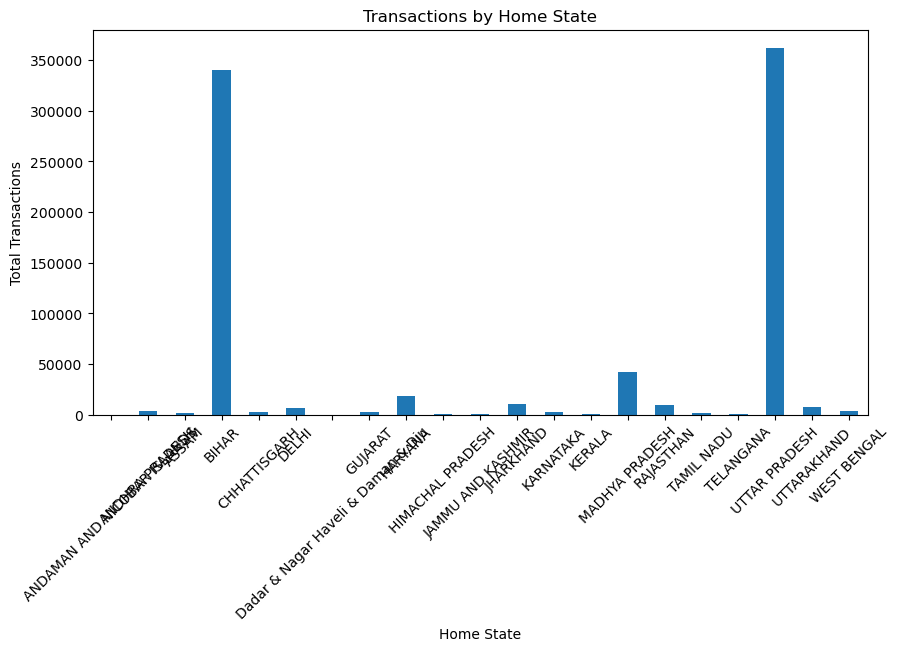

In [84]:
df.groupby('homestatename')['txn_count'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Home State")
plt.ylabel("Total Transactions")
plt.title("Transactions by Home State")
plt.xticks(rotation=45)
plt.show()


##  total transactions by home state, highlighting Bihar and Uttar Pradesh as having the highest transaction counts.

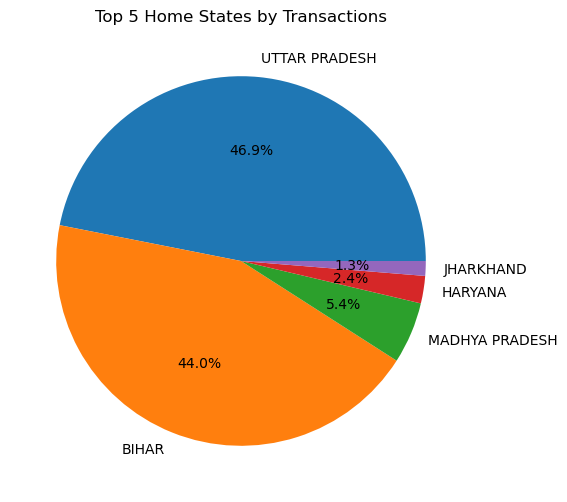

In [87]:
df.groupby("homestatename")["txn_count"].sum().nlargest(5).plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Top 5 Home States by Transactions")
plt.ylabel("")
plt.show()


## top 5 home states by transaction count, with Uttar Pradesh (46.9%) and Bihar (44.0%) having the highest transaction shares.









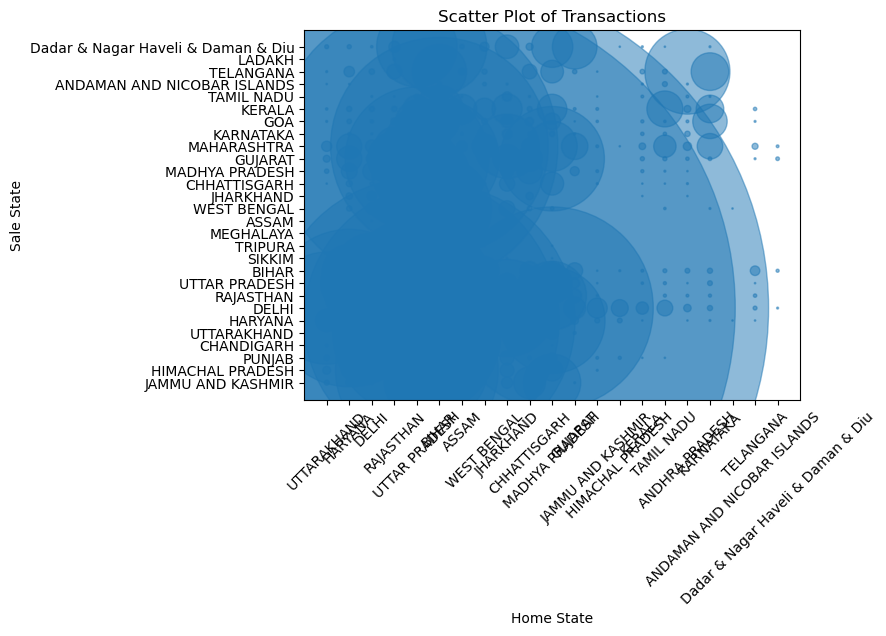

In [90]:
plt.scatter(df["homestatename"], df["salestatename"], s=df["txn_count"], alpha=0.5)
plt.xlabel("Home State")
plt.ylabel("Sale State")
plt.title("Scatter Plot of Transactions")
plt.xticks(rotation=45)
plt.show()


## scatter plot of transactions, where each point represents a transaction between a home state and a sale state, with bubble size indicating the transaction count.

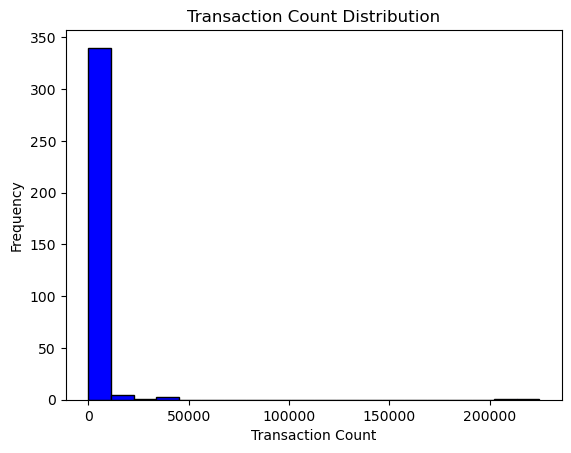

In [93]:
df["txn_count"].plot(kind="hist", bins=20, color="blue", edgecolor="black")
plt.xlabel("Transaction Count")
plt.ylabel("Frequency")
plt.title("Transaction Count Distribution")
plt.show()


## histogram of transaction counts, illustrating the frequency distribution of transaction values, where most transactions fall within a lower range, indicating a right-skewed distribution.

In [96]:
mean_txn = df["txn_count"].mean()
print("Mean Transaction Count:", mean_txn)

Mean Transaction Count: 2314.77207977208


In [98]:
median_txn = df["txn_count"].median()
print("Median Transaction Count:", median_txn)


Median Transaction Count: 20.0


In [100]:
mode_txn = df["txn_count"].mode()[0]
print("Mode Transaction Count:", mode_txn)


Mode Transaction Count: 1


In [102]:
from scipy import stats  

state1 = df[df["homestatename"] == "California"]["txn_count"]
state2 = df[df["homestatename"] == "Texas"]["txn_count"]

t_stat, p_value = stats.ttest_ind(state1, state2, nan_policy='omit')  
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: nan
P-Value: nan


In [104]:
pop_mean = df["txn_count"].mean()
sample = df[df["homestatename"] == "California"]["txn_count"]

t_stat, p_value = stats.ttest_1samp(sample, pop_mean, nan_policy='omit')
print("One-Sample T-Statistic:", t_stat)
print("One-Sample P-Value:", p_value)

One-Sample T-Statistic: nan
One-Sample P-Value: nan


C:\Users\VINITHA\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\VINITHA\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [106]:
print("\nOverall Transaction Count:", df['txn_count'].sum())


Overall Transaction Count: 812485


In [108]:
print("Average Transactions per State:", df.groupby('homestatename')['txn_count'].mean())

Average Transactions per State: homestatename
ANDAMAN AND NICOBAR ISLANDS               1.000000
ANDHRA PRADESH                          243.437500
ASSAM                                    61.227273
BIHAR                                 12597.148148
CHHATTISGARH                            137.000000
DELHI                                   308.571429
Dadar & Nagar Haveli & Daman & Diu        4.500000
GUJARAT                                 144.642857
HARYANA                                 841.409091
HIMACHAL PRADESH                         28.333333
JAMMU AND KASHMIR                        17.857143
JHARKHAND                               497.900000
KARNATAKA                               165.230769
KERALA                                    9.875000
MADHYA PRADESH                         1978.285714
RAJASTHAN                               383.291667
TAMIL NADU                               70.750000
TELANGANA                                10.333333
UTTAR PRADESH                       

In [110]:
print("\nState with Maximum Transactions:", df.groupby('homestatename')['txn_count'].sum().idxmax())


State with Maximum Transactions: UTTAR PRADESH


In [112]:
print("State with Minimum Transactions:", df.groupby('homestatename')['txn_count'].sum().idxmin())

State with Minimum Transactions: ANDAMAN AND NICOBAR ISLANDS


In [114]:
top_avg_states = df.groupby('homestatename')['txn_count'].mean().nlargest(5)
print("\nTop 5 States with Highest Average Transactions:\n", top_avg_states)


Top 5 States with Highest Average Transactions:
 homestatename
UTTAR PRADESH     15745.826087
BIHAR             12597.148148
MADHYA PRADESH     1978.285714
HARYANA             841.409091
JHARKHAND           497.900000
Name: txn_count, dtype: float64


In [116]:
state_mapping = df.groupby(['homestatename', 'salestatename'])['txn_count'].sum().reset_index()
print("\nHome State vs Sale State Transactions:\n", state_mapping.sort_values(by='txn_count', ascending=False).head(10))


Home State vs Sale State Transactions:
       homestatename     salestatename  txn_count
44            BIHAR             DELHI     224671
291   UTTAR PRADESH             DELHI     210187
295   UTTAR PRADESH           HARYANA      42000
302   UTTAR PRADESH       MAHARASHTRA      41235
48            BIHAR           HARYANA      38126
56            BIHAR       MAHARASHTRA      24571
220  MADHYA PRADESH             DELHI      21203
308   UTTAR PRADESH       UTTARAKHAND      14650
296   UTTAR PRADESH  HIMACHAL PRADESH      13727
130         HARYANA             DELHI      12855


In [118]:
top_state_pairs = df.groupby(['homestatename', 'salestatename'])['txn_count'].sum().nlargest(5)
print("\nTop 5 Home-Sale State Pairs:\n", top_state_pairs)


Top 5 Home-Sale State Pairs:
 homestatename  salestatename
BIHAR          DELHI            224671
UTTAR PRADESH  DELHI            210187
               HARYANA           42000
               MAHARASHTRA       41235
BIHAR          HARYANA           38126
Name: txn_count, dtype: int64


In [120]:
if 'year' in df.columns:
    yearly_transactions = df.groupby('year')['txn_count'].sum()
    print("\nYearly Transaction Distribution:\n", yearly_transactions)


Yearly Transaction Distribution:
 year
2024    812485
Name: txn_count, dtype: int64


In [122]:
total_transactions = df['txn_count'].sum()
state_percentages = (df.groupby('homestatename')['txn_count'].sum() / total_transactions) * 100
print("\nPercentage of Transactions Per Home State:\n", state_percentages.sort_values(ascending=False))


Percentage of Transactions Per Home State:
 homestatename
UTTAR PRADESH                         44.573623
BIHAR                                 41.862065
MADHYA PRADESH                         5.113202
HARYANA                                2.278319
JHARKHAND                              1.225623
RAJASTHAN                              1.132206
UTTARAKHAND                            0.869678
DELHI                                  0.797553
ANDHRA PRADESH                         0.479393
WEST BENGAL                            0.427331
CHHATTISGARH                           0.337237
KARNATAKA                              0.264374
GUJARAT                                0.249235
ASSAM                                  0.165788
TAMIL NADU                             0.139326
JAMMU AND KASHMIR                      0.030770
HIMACHAL PRADESH                       0.020923
KERALA                                 0.019447
TELANGANA                              0.011446
Dadar & Nagar Haveli & Daman 

In [124]:
median_txn_per_state = df.groupby('homestatename')['txn_count'].median()
print("\nMedian Transactions Per Home State:\n", median_txn_per_state)


Median Transactions Per Home State:
 homestatename
ANDAMAN AND NICOBAR ISLANDS              1.0
ANDHRA PRADESH                           4.0
ASSAM                                    9.0
BIHAR                                 1781.0
CHHATTISGARH                            73.0
DELHI                                   39.0
Dadar & Nagar Haveli & Daman & Diu       4.5
GUJARAT                                 37.0
HARYANA                                 43.0
HIMACHAL PRADESH                         3.5
JAMMU AND KASHMIR                        2.5
JHARKHAND                              110.5
KARNATAKA                               12.0
KERALA                                   4.0
MADHYA PRADESH                         268.0
RAJASTHAN                               22.0
TAMIL NADU                               5.5
TELANGANA                                6.0
UTTAR PRADESH                         2196.0
UTTARAKHAND                             11.5
WEST BENGAL                             14.0
Nam

In [7]:

df["homestatename"] = le.fit_transform(df["homestatename"])
df["salestatename"] = le.fit_transform(df["salestatename"])

X = df[['homestatecode', 'salestatecode', 'homestatename', 'salestatename', 'month', 'year']]
y = (df["txn_count"] > 10000).astype(int)  



Model Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        69
           1       0.00      0.00      0.00         2

    accuracy                           0.96        71
   macro avg       0.49      0.49      0.49        71
weighted avg       0.94      0.96      0.95        71

Confusion Matrix:
 [[68  1]
 [ 2  0]]


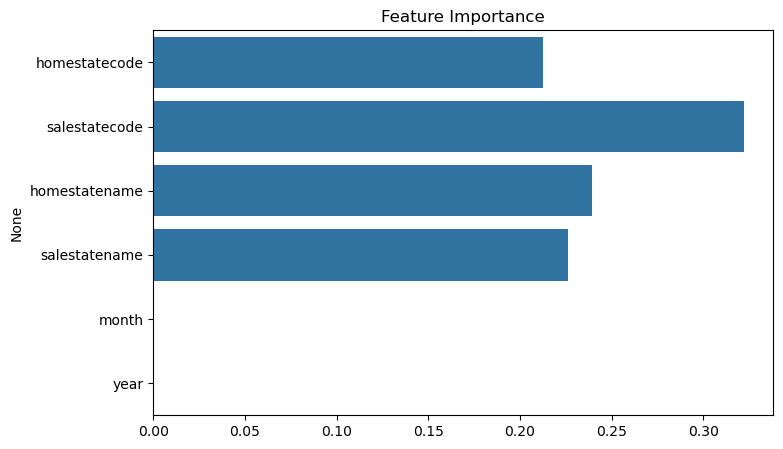

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()


### **Observations and Analysis of the Dataset**  

###### **1. Differences in Transaction Volume**  
- The number of transactions between states varies a lot.  
- Some states have hundreds of thousands of transactions, while others have only a few.  
- This suggests that certain states are more active in inter-state financial activities than others.  

###### **2. Major Financial Centers**  
- A few states handle a large share of transactions, making them important trade and business hubs.  
- These states likely have strong industries, banking networks, or major commercial activities driving high transaction numbers.  

###### **3. Regional Trading Trends**  
- States that are close to each other tend to have higher financial transactions due to ease of business and transportation.  
- However, some states that are far apart also have high transaction numbers, showing strong trade and business connections.  

###### **4. Limited Timeframe for Analysis**  
- The dataset only includes December 2024, so we can’t analyze seasonal trends (e.g., do transactions increase during festivals or end of the financial year?).  
- More data from other months would be needed to understand long-term trends.  

###### **5. Economic Relationships Between States**  
- Some states send more transactions, while others receive more, showing different economic roles.  
- This can help identify which states depend on others for trade and financial activity.  

###### **Further Analysis Opportunities**  
- Which state pairs trade the most? Finding the busiest financial routes.  
- Why do some states have very few transactions? Identifying reasons for low trade activity.  
- Does financial activity match economic growth? Checking if high-transaction states are also the richest.  
- Visualizations: Charts, maps, and graphs can make these patterns clearer.  
